<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/ML%20Algorithms/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbours

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
class KNN:
  def __init__(self,k=3):
    self.k = k
  def euclidean_distance(self,x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)
  def fit(self,X,Y):
    self.X_train = X
    self.y_train = Y
    return self
  def single_predict(self,x):
    distance = [self.euclidean_distance(x,x_train) for x_train in self.X_train ]
    label_location = np.argsort(distance)[:self.k]
    labels = [self.y_train[i] for i in label_location]
    return stats.mode(labels)[0][0]
  def predict(self,X):
    predictions = [self.single_predict(x) for x in X]
    return predictions
  def accuracy(self,y_true,y_pred):
    return np.sum(y_true==y_pred)/len(y_pred)


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
x,y = iris.data,iris.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

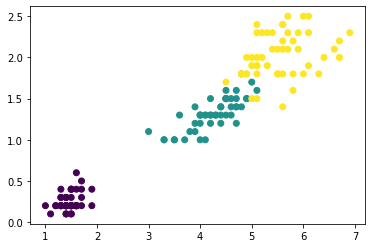

In [ ]:
plt.figure()
plt.scatter(x[:,2],x[:,3],c=y)
plt.show()

In [ ]:
model = KNN(k=5)
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

[1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

In [ ]:
model.accuracy(y_pred,y_test)

0.9